In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
bitcoin_prices = '/content/bitcoin_prices.csv'
bitcoin_tweets = '/content/bitcoin_tweets.csv'

In [ ]:
! pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
tweets_clean_file = '/content/Bitcoin_tweets_clean.csv'

In [ ]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ElKulako/cryptobert")
model = AutoModelForSequenceClassification.from_pretrained("ElKulako/cryptobert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889441728591919}]


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)

sentences = ["there is a shortage of capital, and we need extra financing",
             "growth is strong and we have plenty of liquidity",
             "there are doubts about our finances",
             "profits are flat"]
results = nlp(sentences)
print(results)  #LABEL_0: neutral; LABEL_1: positive; LABEL_2: negative


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

[{'label': 'Negative', 'score': 0.9966173768043518}, {'label': 'Positive', 'score': 1.0}, {'label': 'Negative', 'score': 0.9999710321426392}, {'label': 'Neutral', 'score': 0.9889441728591919}]


In [ ]:
# Load your dataset
# Assume df is your DataFrame with 'text' and 'label' columns
df = pd.read_csv("/content/bitcoin_tweets.csv")

# Print column names
print("Column Names:", df.columns)


Column Names: Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')


In [ ]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataset
df = pd.read_csv("/content/bitcoin_tweets.csv")

# Handle NaN values in the 'text' column (replace NaN with an empty string in this example)
df['text'] = df['text'].fillna('')

# Create a VADER SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Apply the VADER sentiment analysis to each row in the 'text' column
df['compound'] = df['text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Create a 'label' column based on the compound score
df['label'] = df['compound'].apply(lambda x: 1 if x >= 0 else 0)  # Assuming a binary classification task

# Print the DataFrame with the new 'label' column
print(df[['text', 'compound', 'label']])


                                                   text  compound  label
0     Blue Ridge Bank shares halted by NYSE after #b...    0.2960      1
1     😎 Today, that's this #Thursday, we will do a "...    0.8225      1
2     Guys evening, I have read this article about B...    0.5719      1
3     $BTC A big chance in a billion! Price: \487264...    0.3164      1
4     This network is secured by 9 508 nodes as of t...    0.4019      1
...                                                 ...       ...    ...
2823  A new day a new #btc pump? I can barely wait! ...    0.0000      1
2824  Get to know us better!\n\nMeet the Swaap stabl...    0.6588      1
2825  @HeliumUSA @passingbags @CryptoFinally @Davinc...    0.0000      1
2826  🤝 Follow me on @betfury_io. Let's hunt for Bit...    0.5411      1
2827                                                       0.0000      1

[2828 rows x 3 columns]


In [ ]:

import pandas as pd
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load your dataset
df = pd.read_csv("/content/bitcoin_tweets.csv")

# Handle NaN values in the 'text' column (replace NaN with an empty string in this example)
df['text'] = df['text'].fillna('')

# Create a VADER SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Apply the VADER sentiment analysis to each row in the 'text' column
df['compound'] = df['text'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])

# Create a 'label' column based on the compound score
df['label'] = df['compound'].apply(lambda x: 1 if x >= 0 else 0)  # Assuming a binary classification task

# Save the DataFrame with the new 'label' column to a new CSV file
df.to_csv("/content/bitcoin_tweets_with_labels.csv", index=False)

# Print the DataFrame with the new 'label' column
print(df[['text', 'compound', 'label']])



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00
                                                    text  compound  label
0      Blue Ridge Bank shares halted by NYSE after #b...    0.2960      1
1      😎 Today, that's this #Thursday, we will do a "...    0.8225      1
2      Guys evening, I have read this article about B...    0.5719      1
3      $BTC A big chance in a billion! Price: \487264...    0.3164      1
4      This network is secured by 9 508 nodes as of t...    0.4019      1
...                                                  ...       ...    ...
28478  Cardano is soaring, but can ADA gain another 3...    0.6808      1
28479  $EGLD is the best crypto project I ever see, b...    0.6369      1
28480  @Securitize https://t.co/m9lHXEz98l #Crypto #A...    0.0772      1
28481  🔄 Prices update in $USDT (1 hour):\n\n$BTC - 4...   -0.2023      0
28482                                                       0.0000      1

[28483 rows x 3 columns]


In [ ]:
import pandas as pd
import plotly.express as px

# Sample data (replace this with your actual dataset)
data = {
    'Timestamp': pd.date_range('2024-01-01', periods=10, freq='D'),
    'Sentiment_Score': [0.2, -0.1, 0.5, -0.3, 0.8, -0.2, 0.6, -0.4, 0.7, -0.1]
}

df = pd.DataFrame(data)

# Create time series line chart
fig = px.line(df, x='Timestamp', y='Sentiment_Score', title='Bitcoin Tweets Sentiment Over Time')
fig.update_xaxes(title_text='Timestamp')
fig.update_yaxes(title_text='Sentiment Score')

# Show the plot
fig.show()



In [ ]:
# Load your dataset
# Assume df is your DataFrame with 'text' and 'label' columns
df = pd.read_csv("/content/bitcoin_tweets_with_labels.csv")

# Print column names
print("Column Names:", df.columns)

Column Names: Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'compound',
       'label'],
      dtype='object')


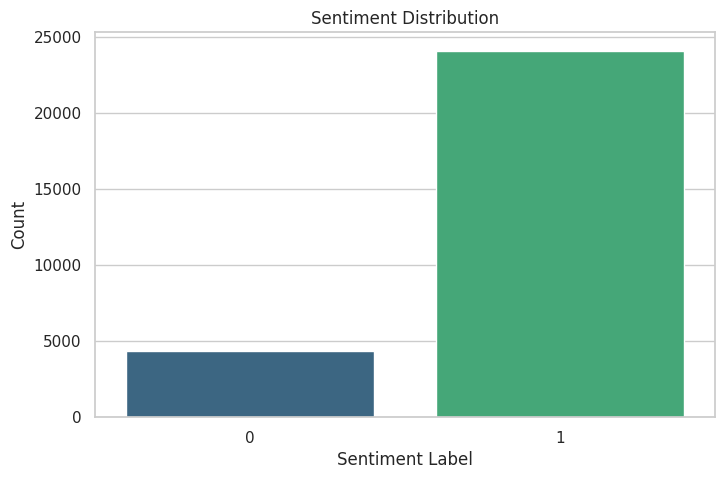

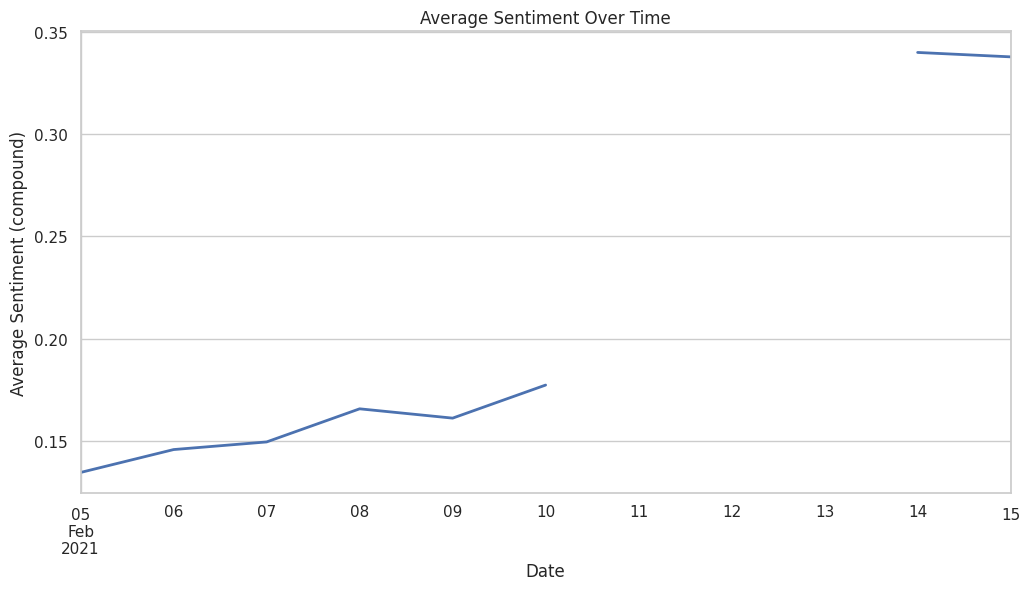

<ipython-input-10-47a93a899b0d>:31: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



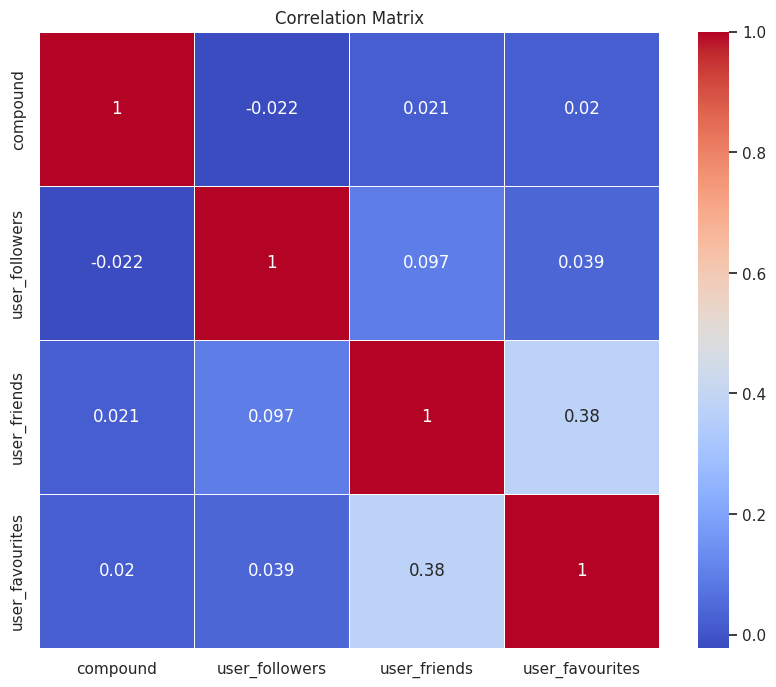

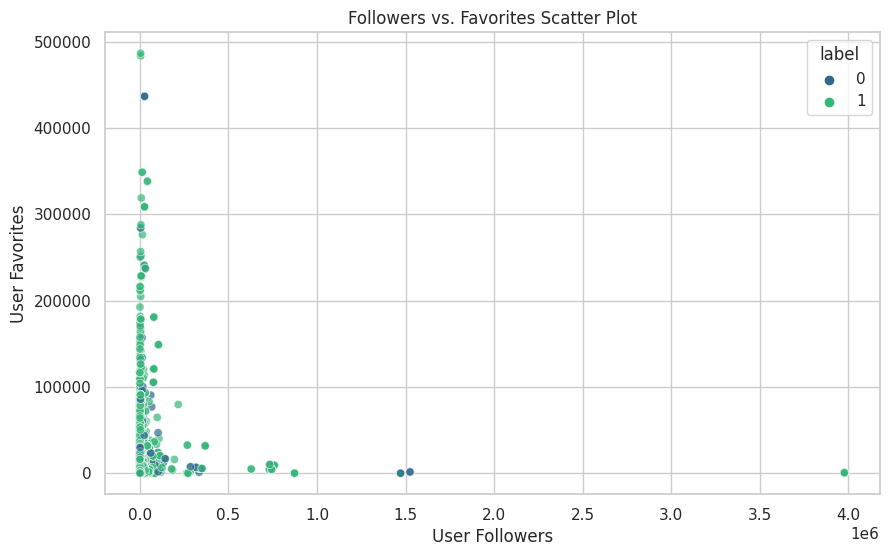

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# Replace 'your_dataset.csv' with the actual path to your CSV file
df = pd.read_csv("/content/bitcoin_tweets_with_labels.csv")

# Set seaborn style
sns.set(style="whitegrid")

# Visualize Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

# Time Series Analysis
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
plt.figure(figsize=(12, 6))
df['compound'].resample('D').mean().plot(linewidth=2)
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (compound)')
plt.show()

# Correlation Matrix
correlation_matrix = df[['compound', 'user_followers', 'user_friends', 'user_favourites', 'is_retweet']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot: Followers vs. Favorites
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_followers', y='user_favourites', hue='label', data=df, palette='viridis', alpha=0.7)
plt.title('Followers vs. Favorites Scatter Plot')
plt.xlabel('User Followers')
plt.ylabel('User Favorites')
plt.show()


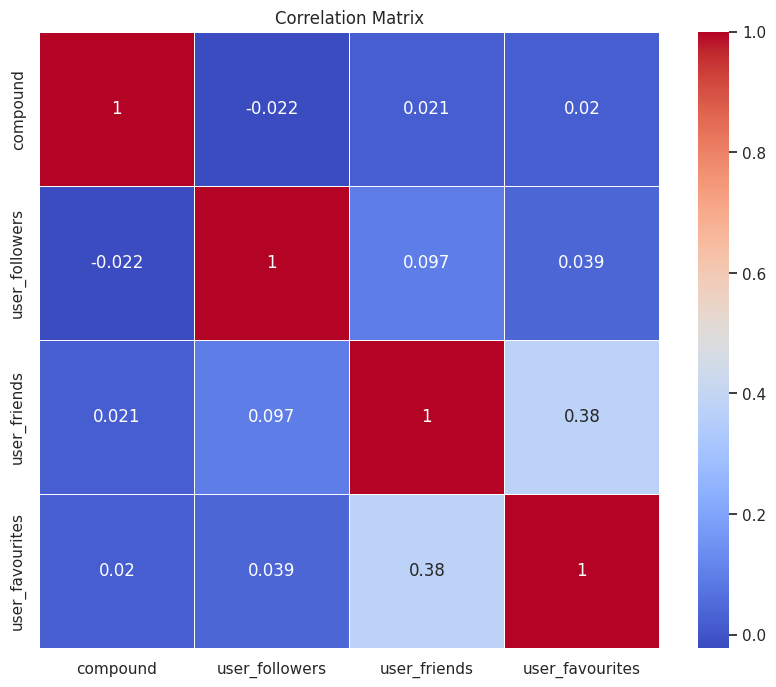

In [ ]:
# Correlation Matrix
correlation_matrix = df[['compound', 'user_followers', 'user_friends', 'user_favourites', 'is_retweet']].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


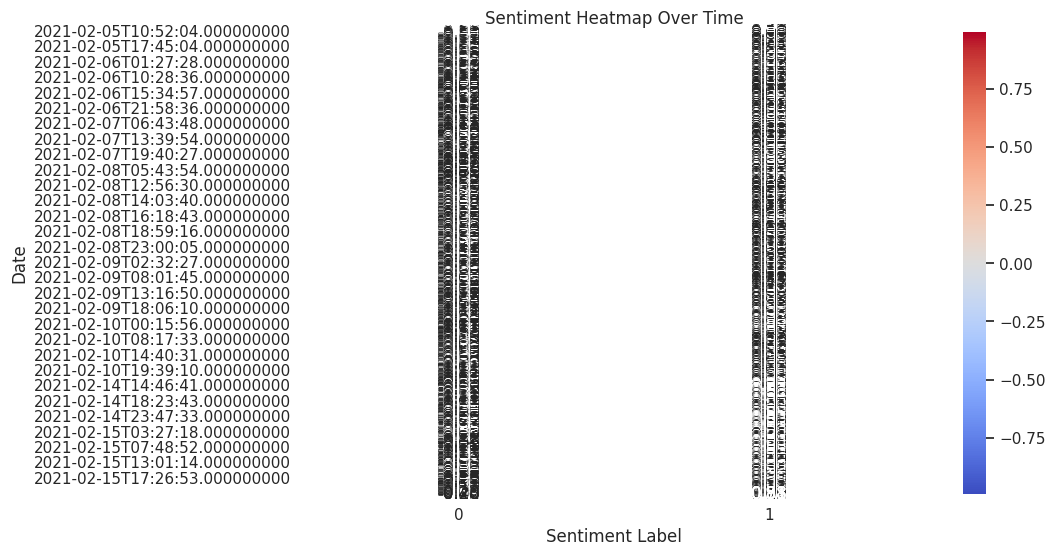

In [ ]:
# Sentiment Heatmap
plt.figure(figsize=(10, 6))
sentiment_heatmap = df.pivot_table(index='date', columns='label', values='compound', aggfunc='mean')
sns.heatmap(sentiment_heatmap, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Sentiment Heatmap Over Time')
plt.xlabel('Sentiment Label')
plt.ylabel('Date')
plt.show()


In [ ]:
# Load your dataset
# Assume df is your DataFrame with 'text' and 'label' columns
df = pd.read_csv("/content/bitcoin_prices.csv")

# Print column names
print("Column Names:", df.columns)

Column Names: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


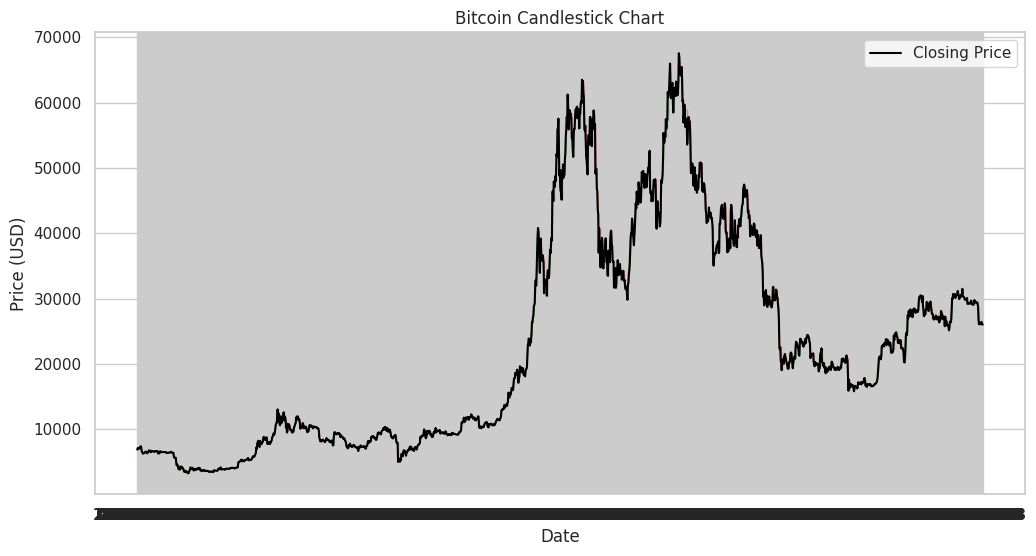

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load your Bitcoin price dataset
# Example assuming you have a CSV file with 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume' columns
df = pd.read_csv("bitcoin_prices.csv")

# Candlestick Chart (using Matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='black')
plt.fill_between(df['Date'], df['Open'], df['Close'], where=df['Close'] >= df['Open'], color='green', alpha=0.4)
plt.fill_between(df['Date'], df['Open'], df['Close'], where=df['Close'] < df['Open'], color='red', alpha=0.4)
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()



In [ ]:
# Candlestick Chart (using Plotly)
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(title='Bitcoin Candlestick Chart using Plotly', xaxis_title='Date', yaxis_title='Price (USD)')
fig.show()


In [ ]:
# Volume Analysis
fig = px.bar(df, x='Date', y='Volume', title='Bitcoin Trading Volume')
fig.show()

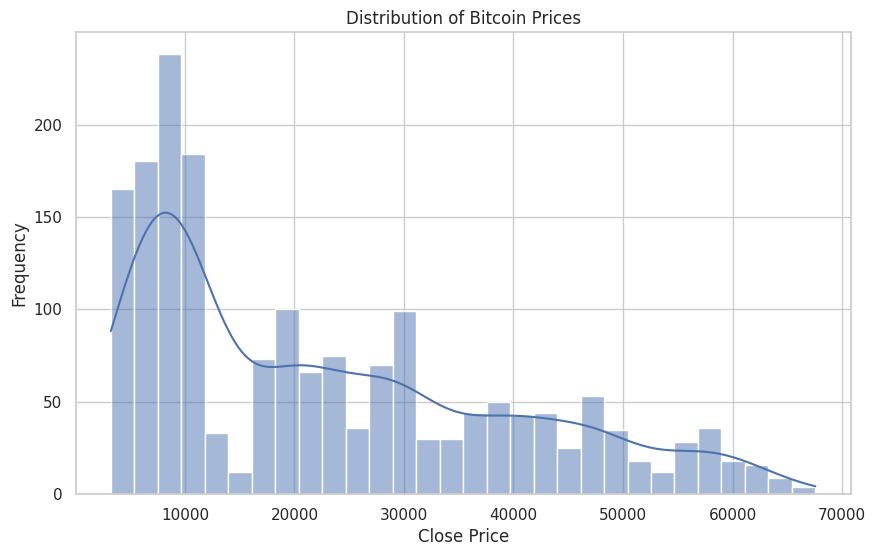

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load your Bitcoin price dataset
bitcoin_data = pd.read_csv("bitcoin_prices.csv")
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(bitcoin_data['Close'], bins=30, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

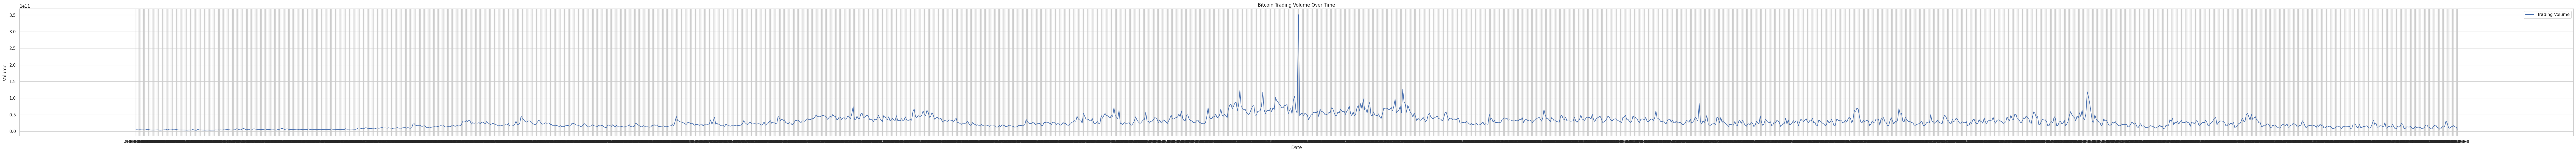

In [ ]:
plt.figure(figsize=(120, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Volume'], label='Trading Volume')
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

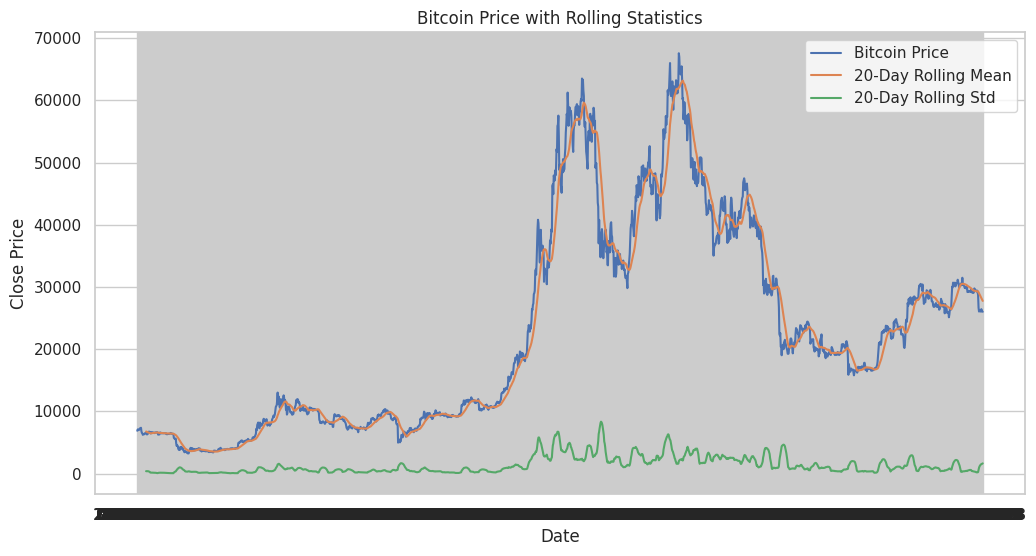

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).mean(), label='20-Day Rolling Mean')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).std(), label='20-Day Rolling Std')
plt.title('Bitcoin Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

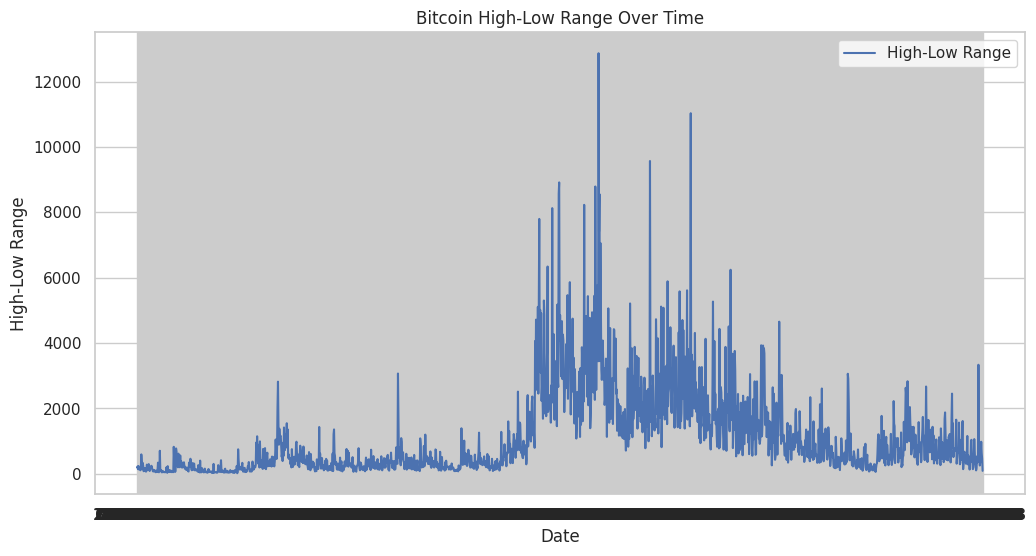

In [ ]:
# High-Low Range Plot
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['High'] - bitcoin_data['Low'], label='High-Low Range')
plt.title('Bitcoin High-Low Range Over Time')
plt.xlabel('Date')
plt.ylabel('High-Low Range')
plt.legend()
plt.show()

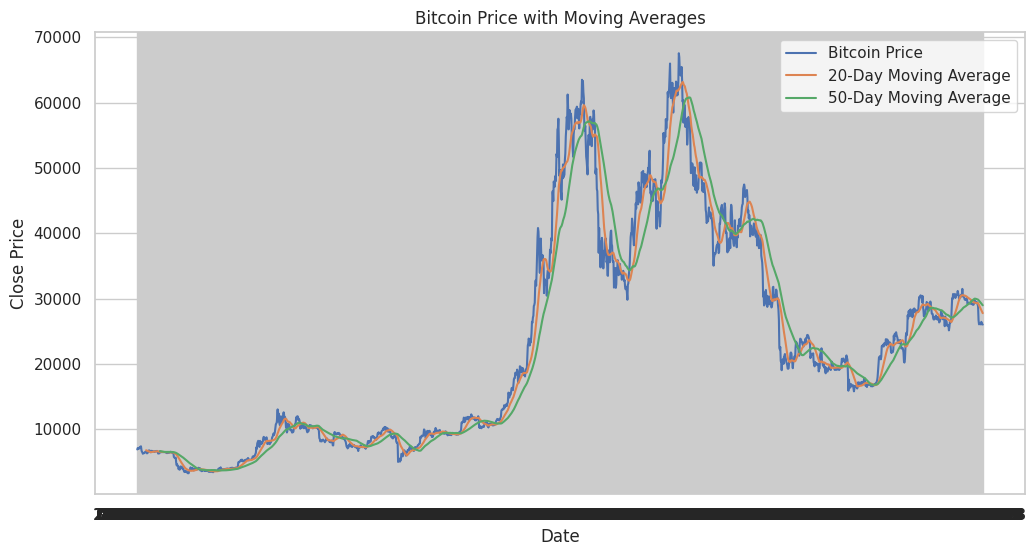

In [ ]:
# Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).mean(), label='20-Day Moving Average')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=50).mean(), label='50-Day Moving Average')
plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

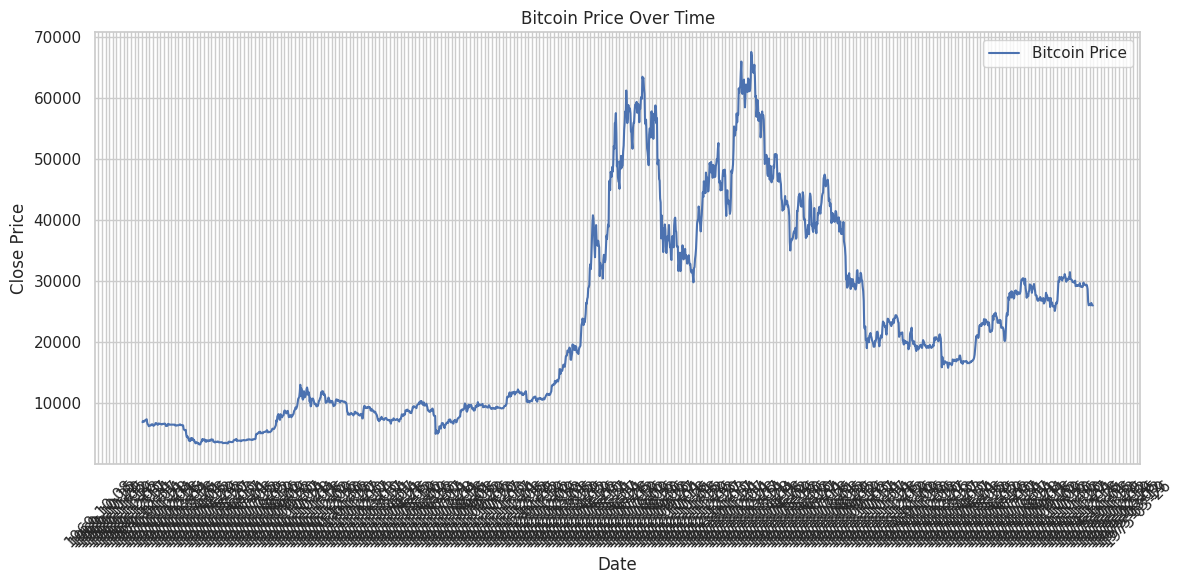

In [ ]:
import matplotlib.dates as mdates

# Assuming you have a DataFrame named 'bitcoin_data' with columns 'Date', 'Close'
# ...

# Time Series Plot with a section of dates
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')

# Set x-axis ticks for every 7 days (you can adjust the frequency based on your preference)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


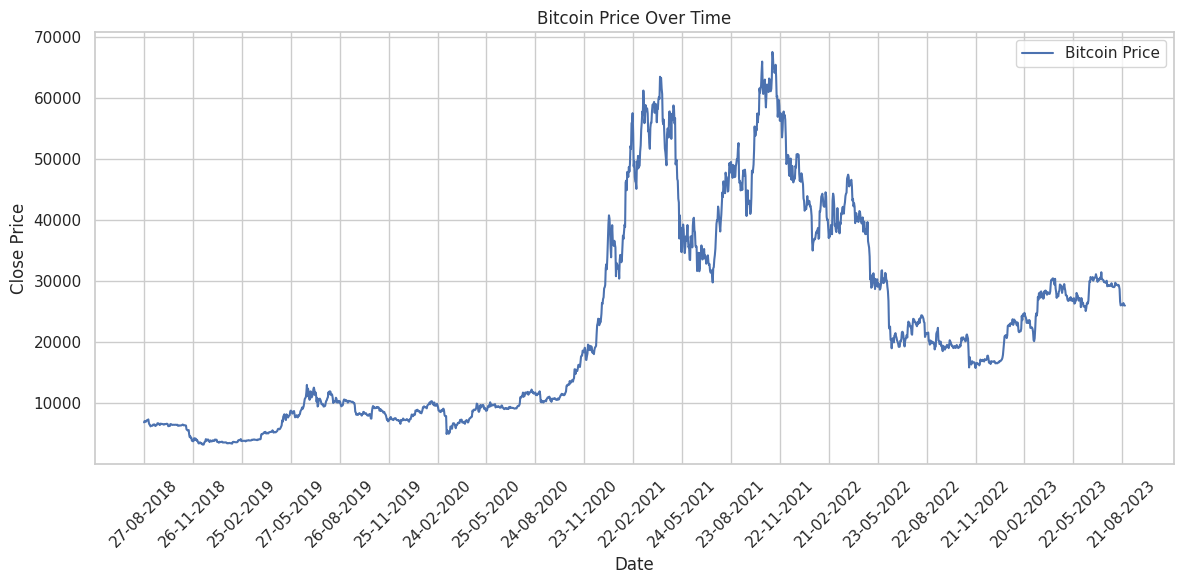

In [ ]:
import matplotlib.dates as mdates

# Assuming you have a DataFrame named 'bitcoin_data' with columns 'Date', 'Close'
# ...

# Time Series Plot with a section of dates
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')

# Select only 20 evenly spaced dates for x-axis ticks
num_ticks = 20
selected_dates = bitcoin_data['Date'][::len(bitcoin_data['Date']) // num_ticks]

# Set x-axis ticks
plt.xticks(selected_dates)

plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()


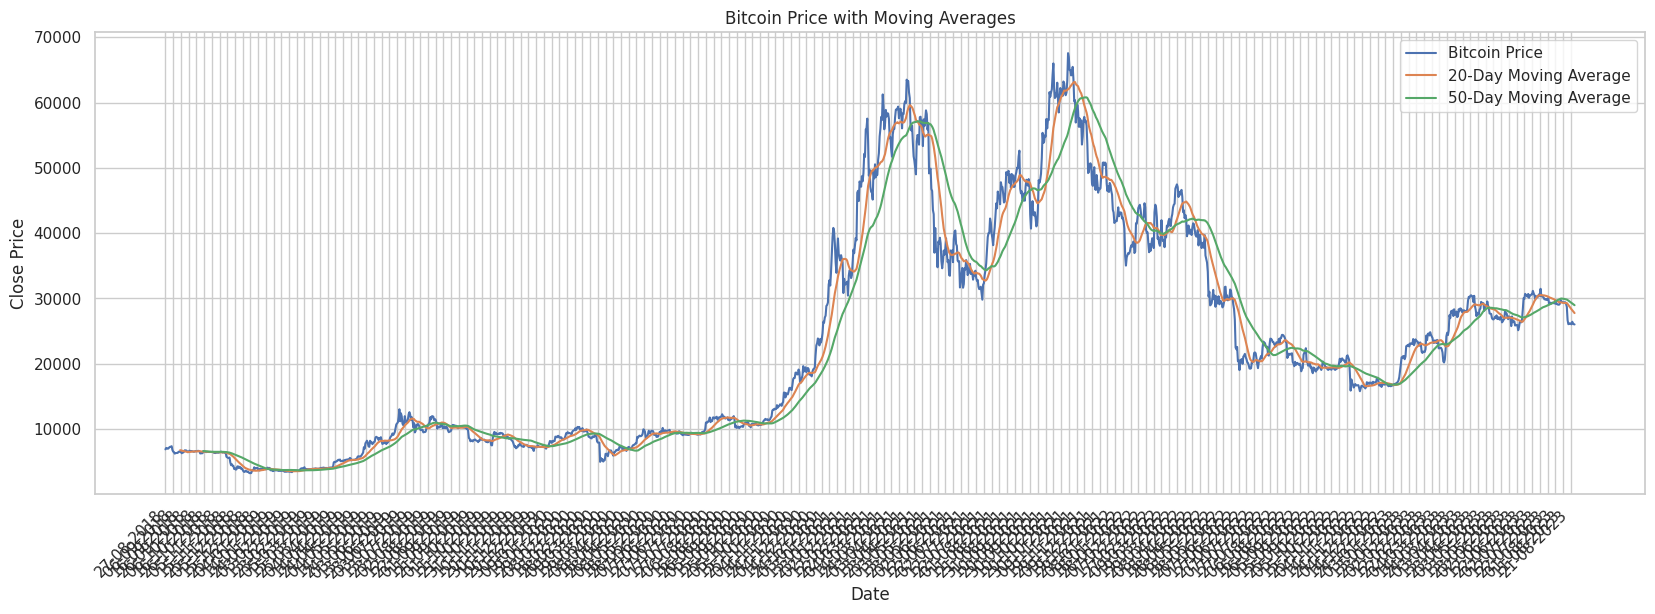

In [ ]:
# Moving Averages
plt.figure(figsize=(20, 6))

# Select every 25th value from the 'Date' column
selected_dates = bitcoin_data['Date'][::10]

plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).mean(), label='20-Day Moving Average')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=50).mean(), label='50-Day Moving Average')

# Set x-axis ticks to the selected dates
plt.xticks(selected_dates, rotation=45, ha='right')

plt.title('Bitcoin Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


<ipython-input-39-36be16d985aa>:4: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



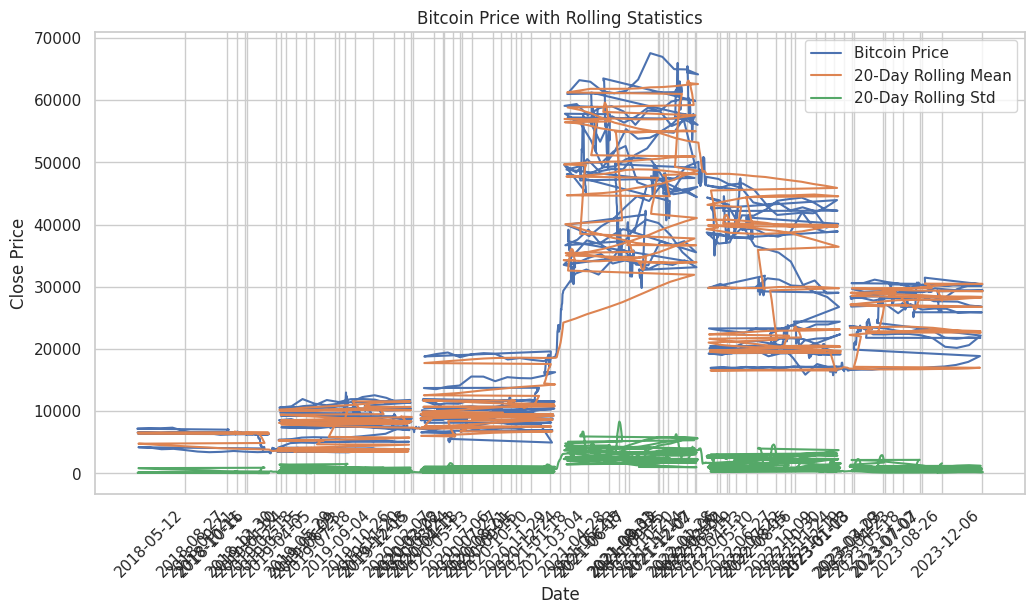

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Date' is in datetime format
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

# Select every 25th data point for better visibility
selected_dates = bitcoin_data['Date'][::25]

plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin Price')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).mean(), label='20-Day Rolling Mean')
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'].rolling(window=20).std(), label='20-Day Rolling Std')
plt.title('Bitcoin Price with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Set x-axis ticks to the selected dates
plt.xticks(selected_dates, rotation=45, ha='right')

plt.show()


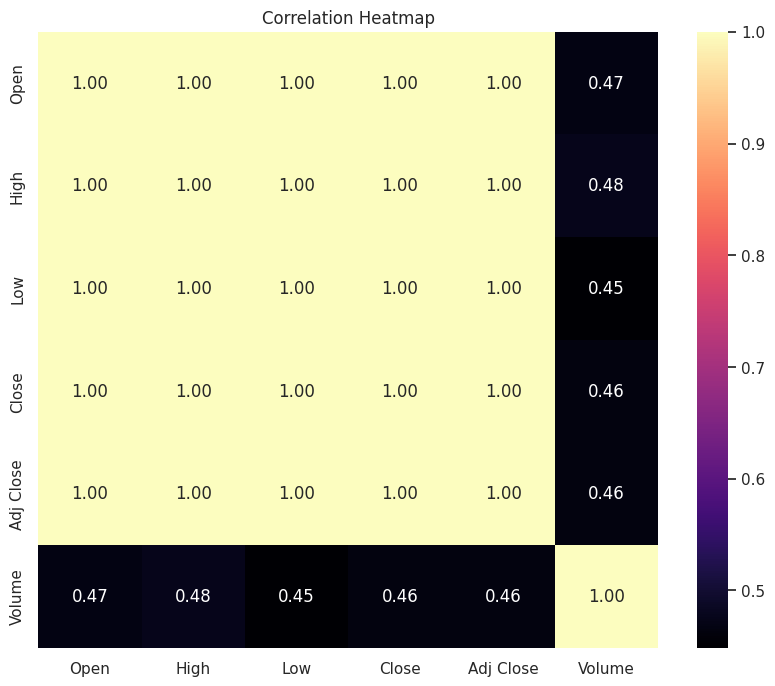

In [ ]:
# Correlation Heatmap with a different colormap (e.g., 'viridis')
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")  # Change 'coolwarm' to 'viridis'cividis', 'plasma', 'magma', 'inferno', 'cubehelix
plt.title('Correlation Heatmap')
plt.show()


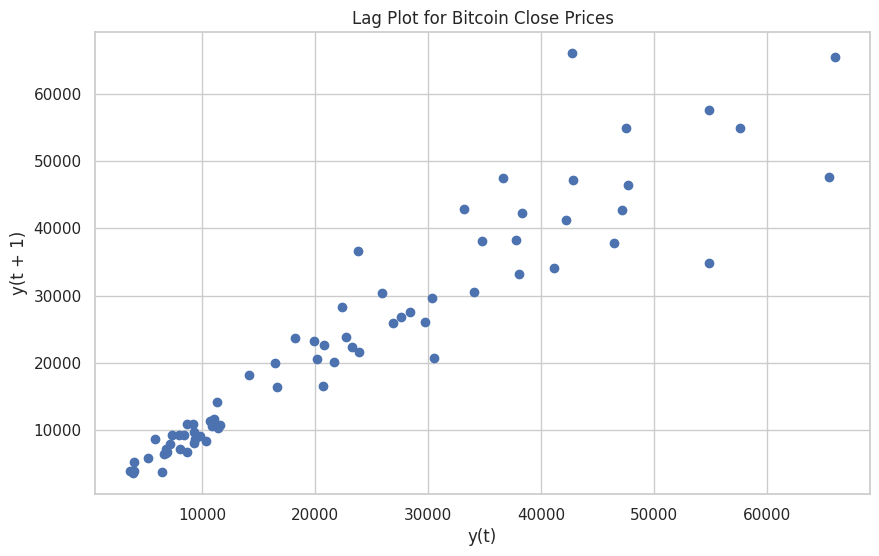

In [ ]:
from pandas.plotting import lag_plot

# Select every 25th data point for better visibility
selected_close_values = df['Close'][::25]

plt.figure(figsize=(10, 6))
lag_plot(selected_close_values, lag=1)
plt.title('Lag Plot for Bitcoin Close Prices')
plt.show()


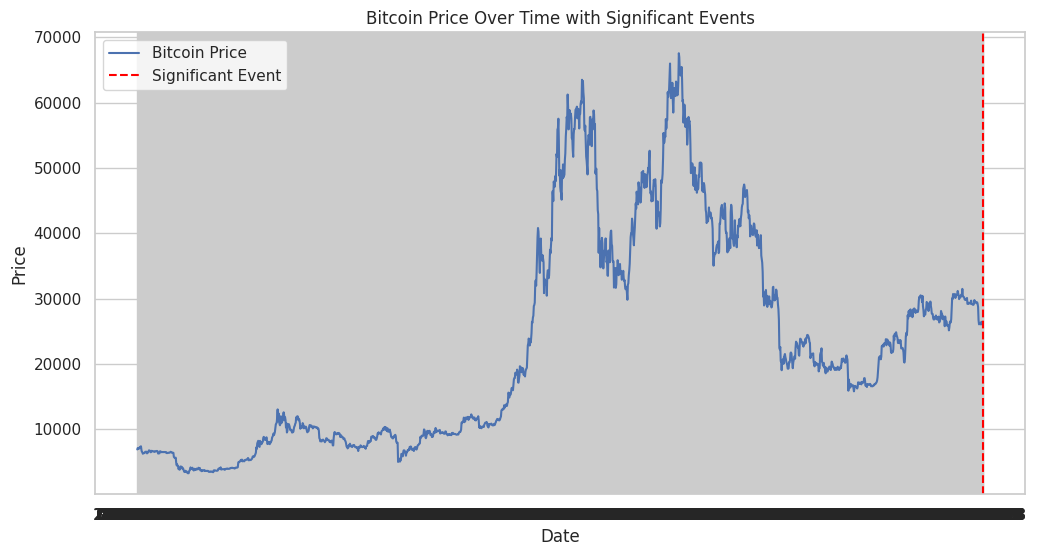

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Price')
plt.title('Bitcoin Price Over Time with Significant Events')
plt.xlabel('Date')
plt.ylabel('Price')
plt.axvline(x='2021-05-08', color='red', linestyle='--', label='Significant Event')
plt.legend()
plt.show()